<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/PFG_Modelo_RegLogMul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de regresión logística múltiple


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Asegúrarse de cambiar la ruta por el nombre real de la carpeta en Google Drive
folder_path = '/content/drive/My Drive/PFG_FASPAS/CR'
docs_xlsx = [f for f in os.listdir(folder_path) if f.endswith('limpio.xlsx')]
print(docs_xlsx)

['CR_SAAF_limpio.xlsx', 'CR_AT_limpio.xlsx', 'CR_LOG_limpio.xlsx', 'CR_EM_limpio.xlsx', 'CR_SO_limpio.xlsx']


In [ ]:
dic_dataframes = {}

for doc in docs_xlsx:
    entire_path = os.path.join(folder_path, doc)
    df = pd.read_excel(entire_path)
    # Uso el nombre del archivo como clave
    dic_dataframes[doc] = df

In [ ]:
df = dic_dataframes.get("CR_SAAF_limpio.xlsx")
df = df.dropna()
del df['FECHA ALTA']
del df ['FECHA NACIMIENTO']
del df ['CP']
df['NIVEL DE ESTUDIOS'].unique()

array(['NS/NC', 'EDUCACION INFANTIL', 'SECUNDARIOS', 'PRIMARIOS',
       'TITULADO UNIVERSITARIO GRADO SUPERIOR',
       'TITULADO UNIVERSITARIO GRADO MEDIO', 'SIN ESTUDIOS',
       'FORMACION PROFESIONAL'], dtype=object)

In [ ]:
df['YEAR NACIMIENTO']

0      1981
1      2020
2      2010
5      2016
6      2023
       ... 
208    2000
215    2001
219    1999
220    1999
224    1989
Name: YEAR NACIMIENTO, Length: 74, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Función para categorizar 'EDAD AL DARSE DE ALTA'
def categorizar_edad_alta(edad):
    if isinstance(edad, float):
        anos = edad
    else:
        anos = int(edad.split(' ')[0])
    if anos < 2:
        return 'BEBE'
    elif anos < 5:
        return 'PEQUEÑO'
    elif anos < 10:
        return 'NIÑO'
    elif anos < 18:
        return 'ADOLESCENTE'
    elif anos < 30:
        return 'JOVEN'
    elif anos < 60:
        return 'ADULTO'
    else:
        return 'ANCIANO'

# Función para categorizar 'YEAR NACIMIENTO'
def categorizar_edad(anos):
    if anos < 1964:
        return 'ANCIANO'
    elif anos < 1994:
        return 'ADULTO'
    elif anos < 2006:
        return 'JOVEN'
    elif anos < 2014:
        return 'ADOLESCENTE'
    elif anos < 2019:
        return 'NIÑO'
    elif anos < 2022:
        return 'PEQUEÑO'
    else:
        return 'BEBE'

# Aplicar las funciones a las columnas de interés
df['EDAD AL DARSE DE ALTA'] = df['EDAD AL DARSE DE ALTA'].apply(categorizar_edad_alta)
df['CATEGORIA_EDAD'] = df['EDAD DIAGNOSTICO - ANOS'].apply(categorizar_edad_alta)
df['YEAR NACIMIENTO'] = df['YEAR NACIMIENTO'].apply(categorizar_edad)

# Convertir variables categóricas en variables dummy
df_dummies = pd.get_dummies(df.drop(['EDAD AL DARSE DE ALTA'], axis=1), drop_first=True)

# Convertir la columna categorizada en variables dummy también
df_categorized = pd.get_dummies(df['CATEGORIA_EDAD'], drop_first=True)

# Añadir la columna categorizada dummy al DataFrame
df_dummies = pd.concat([df_dummies, df_categorized], axis=1)

# Definir la variable dependiente (EDAD DIAGNOSTICO - ANOS)
y = df['EDAD AL DARSE DE ALTA']

# Definir las variables independientes
X = df_dummies

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


<ipython-input-113-efeedc304f4d>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDAD AL DARSE DE ALTA'] = df['EDAD AL DARSE DE ALTA'].apply(categorizar_edad_alta)
<ipython-input-113-efeedc304f4d>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CATEGORIA_EDAD'] = df['EDAD DIAGNOSTICO - ANOS'].apply(categorizar_edad_alta)
<ipython-input-113-efeedc304f4d>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

ValueError: could not convert string to float: 'ANCIANO'

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

       False       0.87      1.00      0.93        13
        True       0.00      0.00      0.00         2

    accuracy                           0.87        15
   macro avg       0.43      0.50      0.46        15
weighted avg       0.75      0.87      0.80        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


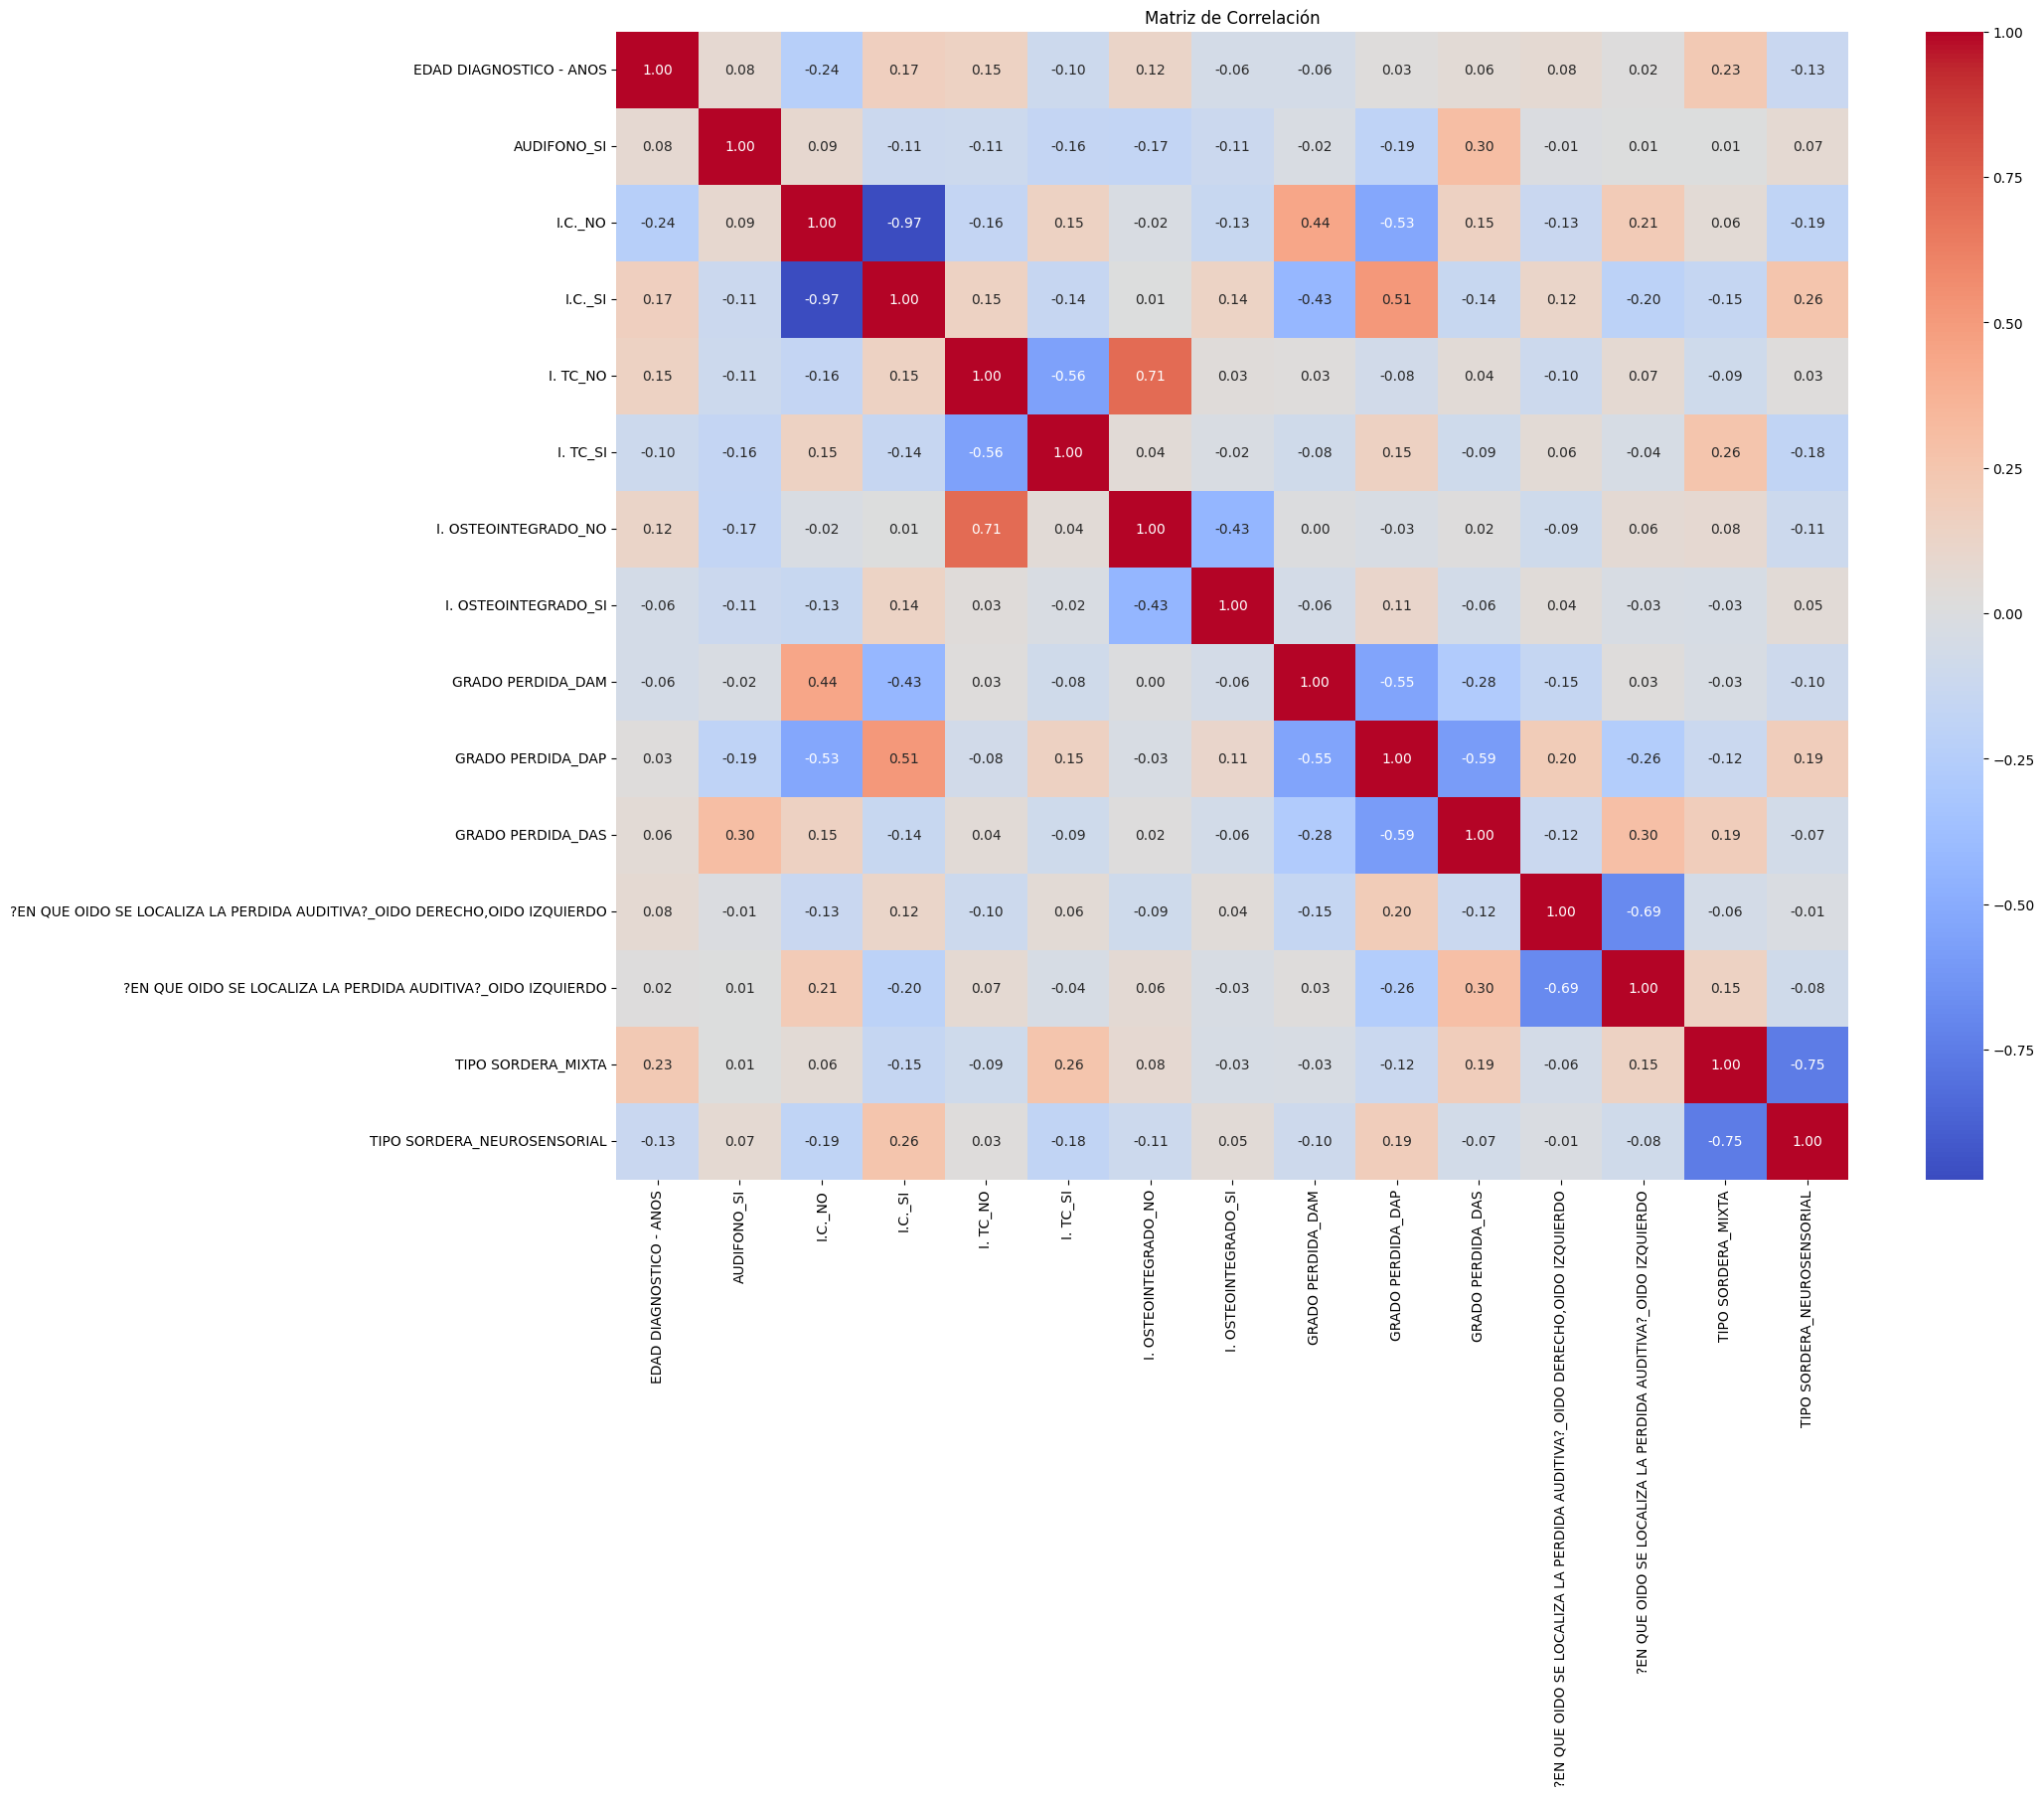

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas especificadas
df_selected = df[['EDAD DIAGNOSTICO - ANOS', 'AUDIFONO', 'I.C.', 'I. TC', 'I. OSTEOINTEGRADO', 'GRADO PERDIDA', '?EN QUE OIDO SE LOCALIZA LA PERDIDA AUDITIVA?', 'TIPO SORDERA']]

# Convertir variables categóricas en variables dummy
df_selected = pd.get_dummies(df_selected, drop_first=True)

# Definir la variable dependiente (TIPO SORDERA) y las variables independientes
y = df_selected['TIPO SORDERA_MIXTA']
X = df_selected.drop('TIPO SORDERA_MIXTA', axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de clasificación
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Mostrar la matriz de correlación
correlation_matrix = df_selected.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Crear la matriz de correlación
correlation_matrix = df_dummies.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()